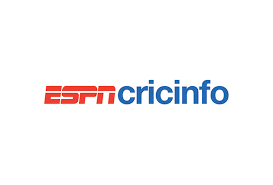

##### In this kaggle kernel, I'm going to do web scraping of Website "https://www.espncricinfo.com/" Page.ESPNcricinfo is a sports news website exclusively for the game of cricket. The site features news, articles, live coverage of cricket matches, and StatsGuru, a database of historical matches and players from the 18th century to the present.I'm going to scrap "ICC ODI Championship" Table and "ICC Twenty20 Rankings" From Ranking Section.


#### First we Import all the Important Packages that are required to do Web Scraping.

 **Numpy** and **Pandas** are standard and I always import it, who knows when it come handy.

**Request**: It is a Python module that you can use to send all kinds of HTTP requests. It is an easy-to-use library with a lot of features ranging from passing parameters in URLs to sending custom headers and SSL Verification.

**BeautifulSoup** : It is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It saves hours or days of work.

* Load in the necessary libraries

In [1]:
pip install bs4

     |████████████████████████████████| 115 kB 1.3 MB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=969427164fcf6fd277f062296f193e00f2fde4096dcc94221588212b02879d92
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

* And here comes the link, first we copy and paste the url and assigned it to the variable link, then we send a request to the web page to reture the information.

*  After requesting, we will check it.it will connected or not.i did here print(response.ok) it gives the output of "<Response [200]>" or "200" and "True" which means you are allowed to do web scraping on such websites.


In [3]:
response = requests.get("https://www.espncricinfo.com/rankings/content/page/211271.html")
response.ok

True

In [4]:
response.headers['Content-Type']

'text/html; charset=UTF-8'

In [5]:
content = response.content

#### we use **Beatiful Soup** to Convert the HTML page in to readable form by passing "html.parser".

In [6]:
read = BeautifulSoup(content, "html.parser")

In [7]:
response

<Response [200]>

* There is only one divider in the ranking section.You can check through **Right Clicking** on the mouse then go to **Inspect Element** The great part of Inspect Element is that only highlite that line where you click your cursor.

In [8]:
read.div

<div class="nav_inner" id="nav_inner">
<div class="nav_btn" id="nav_btn">
<span class="back-icon-svg">
<svg id="Capa_1" style="enable-background:new 0 0 31.494 31.494;" version="1.1" viewbox="0 0 31.494 31.494" x="0px" xml:space="preserve" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" y="0px"> <path d="M10.273,5.009c0.444-0.444,1.143-0.444,1.587,0c0.429,0.429,0.429,1.143,0,1.571l-8.047,8.047h26.554 c0.619,0,1.127,0.492,1.127,1.111c0,0.619-0.508,1.127-1.127,1.127H3.813l8.047,8.032c0.429,0.444,0.429,1.159,0,1.587 c-0.444,0.444-1.143,0.444-1.587,0l-9.952-9.952c-0.429-0.429-0.429-1.143,0-1.571L10.273,5.009z" style="fill:#FFFFFF;"></path> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> </svg>
</span>
</div>
<div class="ci_logo" id="ci_logo">
<a href="/">
<img src="https://www.espncricinfo.com/static/images/logo.png"/>
<span class="logo_txt">ESPN Cricinfo</span>
</a>
</div>


#### First we find the divider class beacuse can't work without mentioning the class name.**

In [9]:
div = read.find_all("div", class_= "ciPhotoContainer")

In [10]:
len(div)

1

1. * click on **ICC Test Championship** on the webpage of Ranking Section **Right Clicking** on the mouse then go to **Inspect Element* see ICC Test Championship is in h3 tag. 

In [11]:
div[0].h3.text

'ICC Test Championship'

* We can find all h3 tags through **find_all** function.

In [12]:
div[0].find_all("h3")

[<h3>ICC Test Championship</h3>,
 <h3>ICC ODI Championship</h3>,
 <h3>ICC Twenty20 Rankings</h3>,
 <h3>ICC Women's ODI Team Rankings</h3>,
 <h3>ICC Women's T20 Team Rankings</h3>]

In [13]:
cric_formats = div[0].find_all("h3")
cric_formats

[<h3>ICC Test Championship</h3>,
 <h3>ICC ODI Championship</h3>,
 <h3>ICC Twenty20 Rankings</h3>,
 <h3>ICC Women's ODI Team Rankings</h3>,
 <h3>ICC Women's T20 Team Rankings</h3>]

**text** function only gives original text remove tags.

In [14]:
for i in cric_formats:
    print(i.text)

ICC Test Championship
ICC ODI Championship
ICC Twenty20 Rankings
ICC Women's ODI Team Rankings
ICC Women's T20 Team Rankings


### save test table to give attribute table.

In [15]:
test_tables = read.table
test_tables

<table class="StoryengineTable">
<caption>02 April 2021</caption>
<tr class="head">
<th class="left">Pos</th>
<th class="left">Team</th>
<th class="left">Matches</th>
<th class="left">Points</th>
<th class="left">Rating</th>
</tr>
<tr>
<td class="left">1</td>
<td class="left">India</td>
<td class="left">37</td>
<td class="left">4455</td>
<td class="left">120</td>
</tr>
<tr>
<td class="left">2</td>
<td class="left">New Zealand</td>
<td class="left">27</td>
<td class="left">3198</td>
<td class="left">118</td>
</tr>
<tr>
<td class="left">3</td>
<td class="left">Australia</td>
<td class="left">31</td>
<td class="left">3498</td>
<td class="left">113</td>
</tr>
<tr>
<td class="left">4</td>
<td class="left">England</td>
<td class="left">49</td>
<td class="left">5174</td>
<td class="left">106</td>
</tr>
<tr>
<td class="left">5</td>
<td class="left">Pakistan</td>
<td class="left">26</td>
<td class="left">2328</td>
<td class="left">90</td>
</tr>
<tr>
<td class="left">6</td>
<td class="left">Sout

 * Find all tables with the help of **find_all** attribute and give class which is mandatory.

### All five tables of ranking are save in the variable.

#### Without mentioning table **class** we cannot find the table we want.

In [16]:
all_tables = read.find_all("table" ,  class_="StoryengineTable")

In [17]:
len(all_tables)

5

### The ODI table is at index 1.

In [18]:
odis = all_tables[1]

###  

### Find Column Name from "th" tag.

In [19]:
col = []
for i in odis.find_all("th"):
    col.append(i.text)

In [20]:
col

['Pos', 'Team', 'Matches', 'Points', 'Rating']

* td tag -> stand for table data.
* th tag -> stand for table header.
* tr tag -> stand for table row.

In [21]:
table_data = odis.find_all("td")
table_data

[<td class="left">1</td>,
 <td class="left">England</td>,
 <td class="left">47</td>,
 <td class="left">5708</td>,
 <td class="left">121</td>,
 <td class="left">2</td>,
 <td class="left">India</td>,
 <td class="left">55</td>,
 <td class="left">6520</td>,
 <td class="left">119</td>,
 <td class="left">3</td>,
 <td class="left">New Zealand</td>,
 <td class="left">35</td>,
 <td class="left">4137</td>,
 <td class="left">118</td>,
 <td class="left">4</td>,
 <td class="left">Australia</td>,
 <td class="left">39</td>,
 <td class="left">4344</td>,
 <td class="left">111</td>,
 <td class="left">5</td>,
 <td class="left">South Africa</td>,
 <td class="left">34</td>,
 <td class="left">3596</td>,
 <td class="left">106</td>,
 <td class="left">6</td>,
 <td class="left">Pakistan</td>,
 <td class="left">38</td>,
 <td class="left">3861</td>,
 <td class="left">102</td>,
 <td class="left">7</td>,
 <td class="left">Bangladesh</td>,
 <td class="left">40</td>,
 <td class="left">3567</td>,
 <td class="left">89<

In [22]:
table_list = []
start = 0
end = 5

for i in range(20):
    Pos,Team, Matches,Points,Rating = table_data[start:end]
    table_list.append([Pos.text,Team.text, Matches.text,Points.text,Rating.text])
    start += 5
    end +=5
    
    

## Now see data is in list of list foam. Now we can put into Data Frame So that it looks good .

In [23]:
table_list

[['1', 'England', '47', '5708', '121'],
 ['2', 'India', '55', '6520', '119'],
 ['3', 'New Zealand', '35', '4137', '118'],
 ['4', 'Australia', '39', '4344', '111'],
 ['5', 'South Africa', '34', '3596', '106'],
 ['6', 'Pakistan', '38', '3861', '102'],
 ['7', 'Bangladesh', '40', '3567', '89'],
 ['8', 'Sri Lanka', '42', '3372', '80'],
 ['9', 'West Indies', '49', '3802', '78'],
 ['10', 'Afghanistan', '31', '1844', '59'],
 ['11', 'Ireland', '29', '1316', '45'],
 ['12', 'Netherlands', '5', '222', '44'],
 ['13', 'Zimbabwe', '27', '1121', '42'],
 ['14', 'Oman', '12', '479', '40'],
 ['15', 'Scotland', '16', '419', '26'],
 ['16', 'UAE', '17', '360', '21'],
 ['17', 'Nepal', '9', '161', '18'],
 ['18', 'Namibia', '9', '152', '17'],
 ['19', 'USA', '14', '185', '13'],
 ['20', 'PNG', '14', '0', '0']]

In [24]:
date = odis.caption.text
date

'07 April 2021'

In [25]:
odi_ranking = pd.DataFrame(table_list , columns=col)
odi_ranking.name = '04 April 2021'

###  ICC ODI Championship Ranking.

In [26]:
print(odi_ranking.name)
odi_ranking.head()

04 April 2021


,Pos,Team,Matches,Points,Rating
0,1,England,47,5708,121
1,2,India,55,6520,119
2,3,New Zealand,35,4137,118
3,4,Australia,39,4344,111
4,5,South Africa,34,3596,106


In [27]:
t20 = all_tables[2]
t20

<table class="StoryengineTable">
<caption>05 April 2021</caption>
<tr class="head">
<th class="left">Pos</th>
<th class="left">Team</th>
<th class="left">Matches</th>
<th class="left">Points</th>
<th class="left">Rating</th>
</tr>
<tr>
<td class="left">1</td>
<td class="left">England</td>
<td class="left">30</td>
<td class="left">8166</td>
<td class="left">272</td>
</tr>
<tr>
<td class="left">2</td>
<td class="left">India</td>
<td class="left">43</td>
<td class="left">11613</td>
<td class="left">270</td>
</tr>
<tr>
<td class="left">3</td>
<td class="left">Australia</td>
<td class="left">30</td>
<td class="left">8005</td>
<td class="left">267</td>
</tr>
<tr>
<td class="left">4</td>
<td class="left">Pakistan</td>
<td class="left">32</td>
<td class="left">8321</td>
<td class="left">260</td>
</tr>
<tr>
<td class="left">5</td>
<td class="left">New Zealand</td>
<td class="left">36</td>
<td class="left">9181</td>
<td class="left">255</td>
</tr>
<tr>
<td class="left">6</td>
<td class="left">So

In [28]:
col = []
for i in t20.find_all("th"):
    col.append(i.text)

In [29]:
col

['Pos', 'Team', 'Matches', 'Points', 'Rating']

In [30]:
table_data1 = t20.find_all("td")
table_data1

[<td class="left">1</td>,
 <td class="left">England</td>,
 <td class="left">30</td>,
 <td class="left">8166</td>,
 <td class="left">272</td>,
 <td class="left">2</td>,
 <td class="left">India</td>,
 <td class="left">43</td>,
 <td class="left">11613</td>,
 <td class="left">270</td>,
 <td class="left">3</td>,
 <td class="left">Australia</td>,
 <td class="left">30</td>,
 <td class="left">8005</td>,
 <td class="left">267</td>,
 <td class="left">4</td>,
 <td class="left">Pakistan</td>,
 <td class="left">32</td>,
 <td class="left">8321</td>,
 <td class="left">260</td>,
 <td class="left">5</td>,
 <td class="left">New Zealand</td>,
 <td class="left">36</td>,
 <td class="left">9181</td>,
 <td class="left">255</td>,
 <td class="left">6</td>,
 <td class="left">South Africa</td>,
 <td class="left">23</td>,
 <td class="left">5776</td>,
 <td class="left">251</td>,
 <td class="left">7</td>,
 <td class="left">Afghanistan</td>,
 <td class="left">19</td>,
 <td class="left">4361</td>,
 <td class="left">2

In [31]:
table_list1 = []
start = 0
end = 5

for i in range(85):
    Pos,Team, Matches,Points,Rating = table_data1[start:end]
    table_list1.append([Pos.text,Team.text, Matches.text,Points.text,Rating.text])
    start += 5
    end +=5

In [32]:
table_list1

[['1', 'England', '30', '8166', '272'],
 ['2', 'India', '43', '11613', '270'],
 ['3', 'Australia', '30', '8005', '267'],
 ['4', 'Pakistan', '32', '8321', '260'],
 ['5', 'New Zealand', '36', '9181', '255'],
 ['6', 'South Africa', '23', '5776', '251'],
 ['7', 'Afghanistan', '19', '4361', '230'],
 ['8', 'West Indies', '29', '6623', '228'],
 ['9', 'Sri Lanka', '26', '5924', '228'],
 ['10', 'Bangladesh', '23', '5194', '226'],
 ['11', 'Ireland', '29', '5513', '190'],
 ['12', 'Zimbabwe', '23', '4341', '189'],
 ['13', 'UAE', '23', '4288', '186'],
 ['14', 'Scotland', '17', '3096', '182'],
 ['15', 'Nepal', '23', '4148', '180'],
 ['16', 'PNG', '21', '3769', '179'],
 ['17', 'Netherlands', '26', '4618', '178'],
 ['18', 'Oman', '18', '3169', '176'],
 ['19', 'Namibia', '22', '3482', '158'],
 ['20', 'Singapore', '20', '2835', '142'],
 ['21', 'Canada', '15', '1956', '130'],
 ['22', 'Qatar', '23', '2982', '130'],
 ['23', 'Hong Kong', '23', '2727', '119'],
 ['24', 'Kenya', '12', '1389', '116'],
 ['25', '

In [33]:
updated_date = t20.caption.text
updated_date

'05 April 2021'

In [34]:
t20_ranking = pd.DataFrame(table_list1 , columns=col)

### ICC Twenty20 Rankings

In [35]:
print(updated_date)
t20_ranking.head(10)

05 April 2021


,Pos,Team,Matches,Points,Rating
0,1,England,30,8166,272
1,2,India,43,11613,270
2,3,Australia,30,8005,267
3,4,Pakistan,32,8321,260
4,5,New Zealand,36,9181,255
5,6,South Africa,23,5776,251
6,7,Afghanistan,19,4361,230
7,8,West Indies,29,6623,228
8,9,Sri Lanka,26,5924,228
9,10,Bangladesh,23,5194,226


### If your like my notebook.
### Plz upvoted.